## What is Random forest?

A Random Forest is like a group decision-making team in machine learning. It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.

### Working of Random Forest Algorithm

Bagging:

It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

Boosting:

It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST.

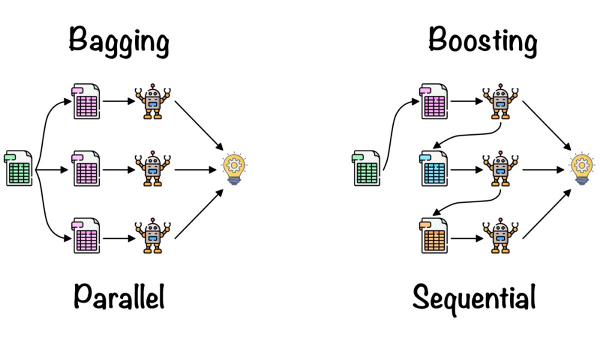

#### Random forest works on the Bagging principle.

### Hyperparameters to Increase the Predictive Power
##### n_estimators: Number of trees the algorithm builds before averaging the predictions.
##### max_features: Maximum number of features random forest considers splitting a node.
##### mini_sample_leaf:  specifies the minimum number of samples that should be present in the leaf node after splitting a node.
##### criterion: How to split the node in each tree? (Entropy/Gini impurity)
##### max_leaf_nodes: Maximum leaf nodes in each tree

### Hyperparameters to Increase the Speed
##### n_jobs: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.
##### random_state: controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same hyperparameters and training data.
##### oob_score: OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.

## IMPLEMENTATION

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('heart.csv')

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.shape

(303, 14)

In [46]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("acc:",accuracy_score(y_test,y_pred))
print("mae:",mean_absolute_error(y_test,y_pred))
print("mse:",mean_squared_error(y_test,y_pred))

acc: 0.8524590163934426
mae: 0.14754098360655737
mse: 0.14754098360655737


In [54]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("acc:",accuracy_score(y_test,y_pred))
print("mae:",mean_absolute_error(y_test,y_pred))
print("mse:",mean_squared_error(y_test,y_pred))

acc: 0.9016393442622951
mae: 0.09836065573770492
mse: 0.09836065573770492


In [55]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.8280645161290323

In [56]:
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
179,0,0
228,0,0
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


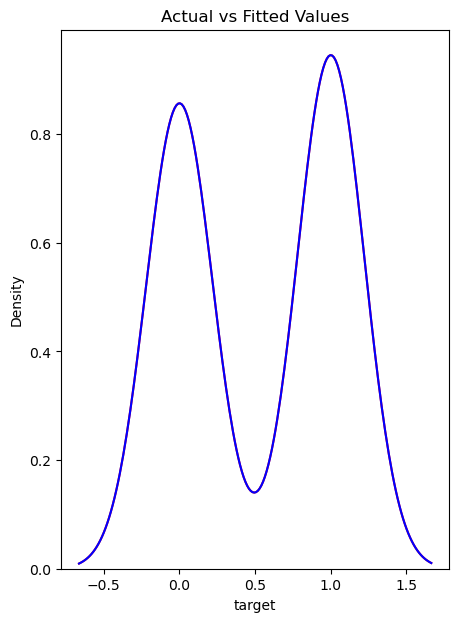

In [57]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()

### Gridsearchcv

In [58]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [59]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [60]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [61]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.75,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [62]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.75, 'n_estimators': 20}

In [63]:
rf_grid.best_score_

0.8386904761904763

In [64]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
179,0,0
228,0,0
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


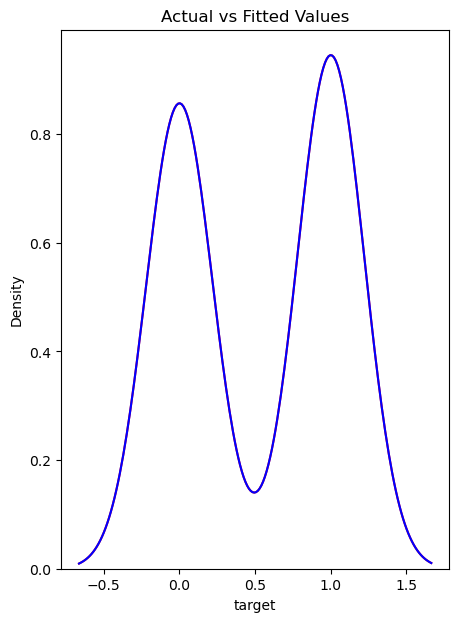

In [65]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()

### Randomsearchcv

In [66]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [67]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [68]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [69]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_samples=0.75,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [70]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': 2,
 'bootstrap': True}

In [71]:
rf_grid.best_score_

0.8261904761904763

In [72]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
179,0,0
228,0,0
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


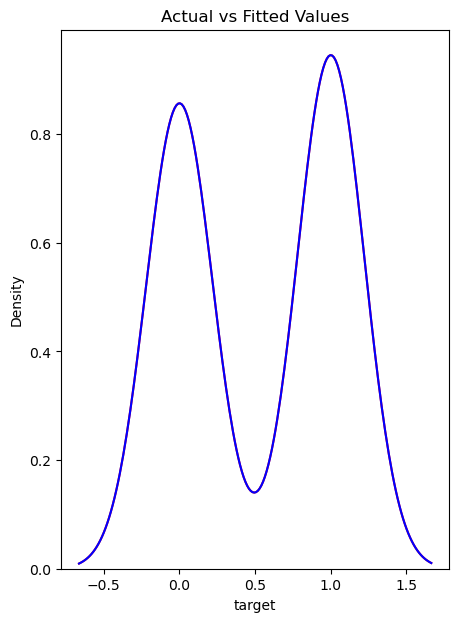

In [73]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()

### OUT OF BAG SCORE

In [74]:
rf1 = RandomForestClassifier(oob_score=True)

In [75]:
rf1.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [76]:
rf1.oob_score_

0.7892561983471075

In [77]:
y_pred = rf1.predict(X_test)
accuracy_score(y_test,y_pred)

0.8360655737704918

In [78]:
d_f=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
d_f

,Actual,Predicted
179,0,0
228,0,1
111,1,0
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


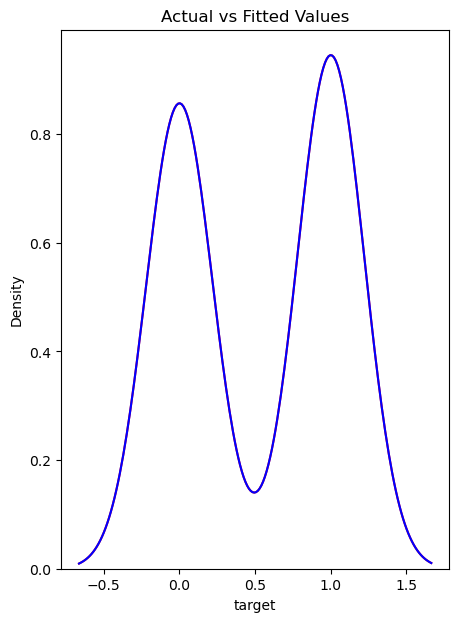

In [80]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()

In [81]:
print("mae:",mean_absolute_error(y_test,y_pred))
print("mse:",mean_squared_error(y_test,y_pred))

mae: 0.16393442622950818
mse: 0.16393442622950818
